In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# Load dataset

items = pd.read_csv('items.csv')
item_category = pd.read_csv('item_categories.csv')
shops = pd.read_csv('shops.csv')
sales_train = pd.read_csv('sales_train.csv')
test = pd.read_csv('test.csv')
# sample_submit = pd.read_csv('sample_submission.csv')

# Exploratory data analysis
## Items

In [3]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [4]:
items.describe()

,item_id,item_category_id
count,22170.00000,22170.000000
mean,11084.50000,46.290753
std,6400.07207,15.941486
min,0.00000,0.000000
25%,5542.25000,37.000000
50%,11084.50000,40.000000
75%,16626.75000,58.000000
max,22169.00000,83.000000


In [5]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   item_name         22170 non-null  object
 1   item_id           22170 non-null  int64 
 2   item_category_id  22170 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 519.7+ KB


There are 22,170 items in total, each has a unique id and one item can only belong to one category. There are 84 categories in total.

## Item category

In [6]:
item_category.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [7]:
item_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   item_category_name  84 non-null     object
 1   item_category_id    84 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ KB


Each category has a name. Maybe the sales of some categories are correlated with each other. This could be observable from their names.

## Shops

In [8]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [9]:
shops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   shop_name  60 non-null     object
 1   shop_id    60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


There are 60 shops. Each shop has an ID and a name. Maybe the name of shop reflects the location, which could have predictive power.

## Test

In [10]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214200 entries, 0 to 214199
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   ID       214200 non-null  int64
 1   shop_id  214200 non-null  int64
 2   item_id  214200 non-null  int64
dtypes: int64(3)
memory usage: 4.9 MB


Make prediction for each item for each shop. Total of 214,200 predictions. ID is just an index column.

## Sample submission

In [16]:
sample_submit.head()

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


We need to predict the item_cnt_month for each item for each shop in the test set.

## Sales train

In [13]:
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [14]:
sales_train.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


In [15]:
sales_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


- Each row represents a transaction of a particular item of a particular store. date_block_num is an index used to identify a particular month. There are total of 34 months in the training set. 
- Item price could change through out the period. 
- Item_cnt_day has negative values which indicates return of products. 
- Item_price has negative values which is dubious.
- In most of the store, the unit sold of a particular product is 1 in a typical day. The highest value is 2169, which is significantly higher than others.

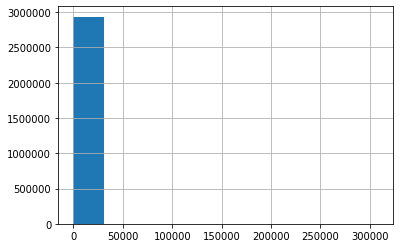

In [18]:
sales_train.item_price.hist()

Outliers are present in the dataset. Need boxplot to check.

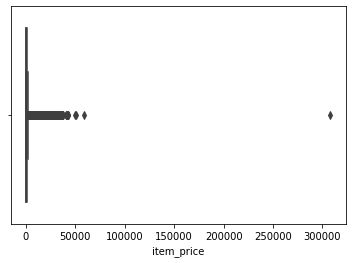

In [19]:
sns.boxplot(sales_train.item_price)

In [20]:
sales_train.item_price.value_counts().reset_index().sort_values(by=['index'], ascending = False)

,index,item_price
13031,307980.0000,1
14065,59200.0000,1
15025,50999.0000,1
15750,49782.0000,1
4897,42990.0000,4
...,...,...
90,0.1000,2932
11294,0.0900,1
15161,0.0875,1
8189,0.0700,2


There is one item that is sold for 307,980, super expensive. It is worthwhile to check what software it is.

In [21]:
sales_train[sales_train.item_price == 307980]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
1163158,13.12.2013,11,12,6066,307980.0,1.0


In [22]:
items[items['item_id']==6066]

,item_name,item_id,item_category_id
6066,Radmin 3 - 522 лиц.,6066,75


In [23]:
sales_train[sales_train.item_id == 6066]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
1163158,13.12.2013,11,12,6066,307980.0,1.0


There are only one transaction of such software.

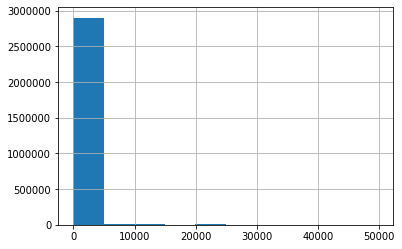

In [24]:
sales_train[sales_train.item_price<50000].item_price.hist()

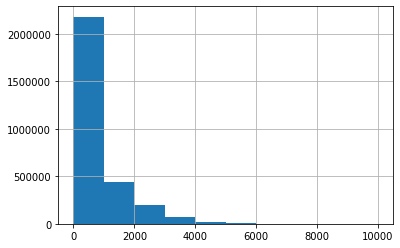

In [25]:
sales_train[sales_train.item_price<10000].item_price.hist()

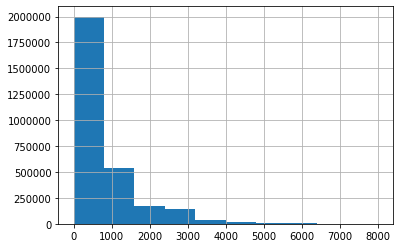

In [26]:
sales_train[sales_train.item_price<8000].item_price.hist()

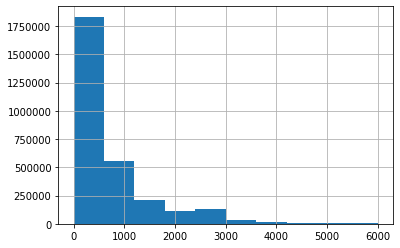

In [27]:
sales_train[sales_train.item_price<6000].item_price.hist()

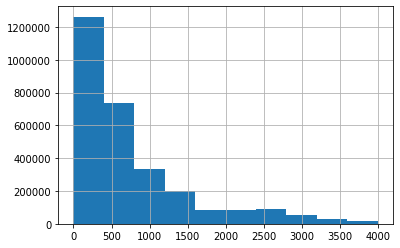

In [28]:
sales_train[sales_train.item_price<4000].item_price.hist()

## Translate Russian characters to English
### Categories

In [29]:
item_category.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [31]:
# extract meta category
from google_trans_new import google_translator  
translator = google_translator() 

category = []
# extract Russian meta category
for i in range(len(item_category)):
    temp = item_category.loc[i,'item_category_name']
    category.append(temp)
# translate meta category to English
for i in range(len(category)):
    category[i] = translator.translate(category[i],lang_src='ru',lang_tgt='en')
    
item_category['item_category_name'] = category

In [37]:
item_category.to_hdf('item_category_translated.h5', 'item_category_translated')

### Shops

In [41]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [34]:
# translatae shpos name to english
shops_english = []

for i in range(len(shops)):
    translate_text = translator.translate(shops.loc[i,'shop_name'],lang_src='ru',lang_tgt='en')
    shops_english.append(translate_text)

In [13]:
shops['shop_name'] = shops_english

,shop_id,shop_name
0,0,"! Yakutsk Ordzhonikidze, 56 francs"
1,1,"! Yakutsk TC ""Central"" fran"
2,2,"Adygea shopping center ""Mega"""
3,3,"Balashikha TRK ""October-Kinomir"""
4,4,"Volzhsky shopping center ""Volga Mall"""


In [44]:
shops

,shop_id,shop_name
0,0,"! Yakutsk Ordzhonikidze, 56 francs"
1,1,"! Yakutsk TC ""Central"" fran"
2,2,"Adygea shopping center ""Mega"""
3,3,"Balashikha TRK ""October-Kinomir"""
4,4,"Volzhsky shopping center ""Volga Mall"""
5,5,"Vologda SEC ""Marmelad"""
6,6,"Voronezh (Plekhanovskaya, 13)"
7,7,"Voronezh SEC ""Maksimir"""
8,8,"Voronezh SEC City-Park ""Grad"""
9,9,Offsite Trade


shop 0 and 1 have the same name as shop 57 and 58. This can be an error

In [45]:
shops.to_hdf('shops_translated.h5','shops_translated')

### Items

In [106]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [107]:
items_english = []
for i in range(len(items)):
    temp = translator.translate(items.loc[i,'item_name'],lang_src='ru',lang_tgt='en')
    items_english.append(temp)

In [110]:
items['item_name'] = items_english
items.to_hdf('items_translated.h5', 'items_translated')

## Sales_train
### Preprocessing

In [22]:
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [23]:
# calculate revenue
sales_train['revenue'] = sales_train['item_price'] * sales_train['item_cnt_day']

In [24]:
# extract day, week, year, day of week from date
date_time = pd.to_datetime(sales_train['date'], format = '%d.%m.%Y')
sales_train['date'] = date_time
sales_train['day'] = date_time.dt.day
sales_train['month'] = date_time.dt.month
sales_train['year'] = date_time.dt.year
sales_train['day_of_week'] =date_time.dt.dayofweek

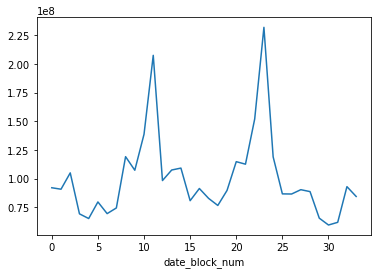

In [25]:
# sales revenue by month
sales_train.groupby('date_block_num').sum()['revenue'].plot()

Sales revenue peaked at year end which makes sense.

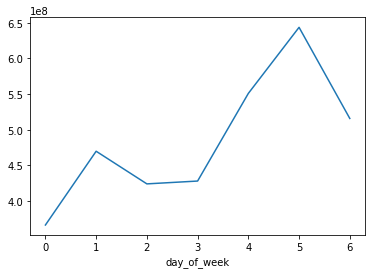

In [27]:
# sales revenue by day of week
sales_train.groupby('day_of_week').sum()['revenue'].plot()

Sales revenue was higher during weekend.

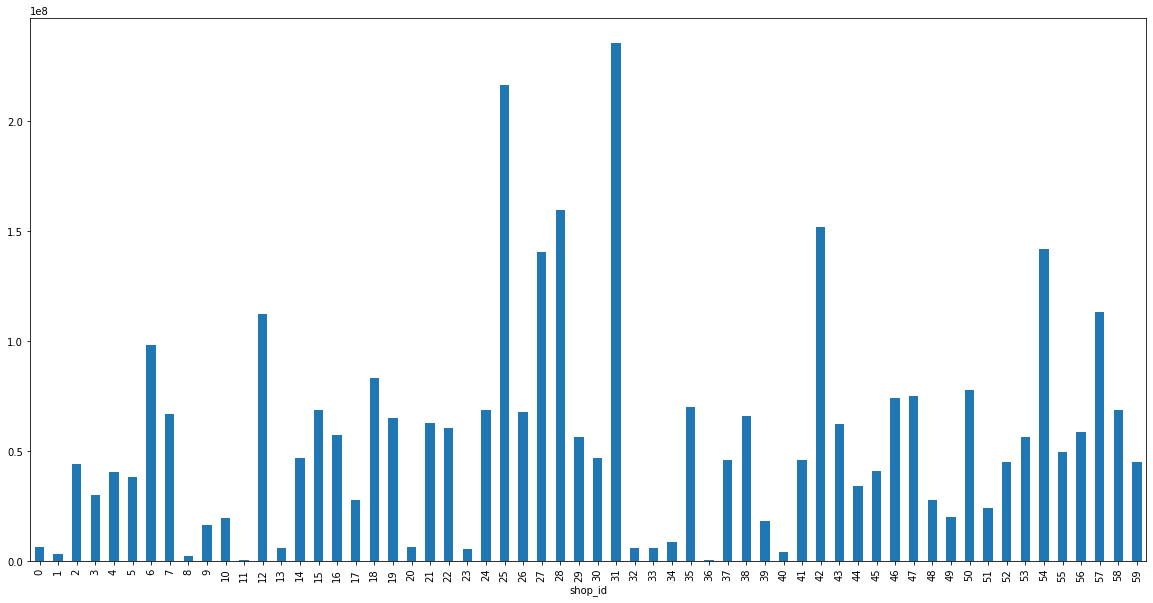

In [28]:
# sales revnue by shop
sales_train.groupby('shop_id').sum()['revenue'].plot(kind='bar', figsize = (20,10))

In [66]:
shops

,shop_id,shop_name
2,2,"Adygea shopping center ""Mega"""
3,3,"Balashikha TRK ""October-Kinomir"""
4,4,"Volzhsky shopping center ""Volga Mall"""
5,5,"Vologda SEC ""Marmelad"""
6,6,"Voronezh (Plekhanovskaya, 13)"
7,7,"Voronezh SEC ""Maksimir"""
8,8,"Voronezh SEC City-Park ""Grad"""
9,9,Offsite Trade
10,10,Zhukovsky st. Chkalov 39m?
11,11,Zhukovsky st. Chkalov 39m²


Shops located in Moscow has the highest sales revenue.

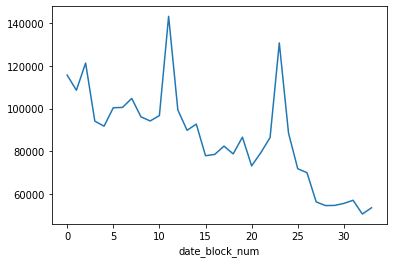

In [188]:
# trend of transaction number by month
sales_train.groupby('date_block_num').count()['shop_id'].plot()

Transaction number is decreasing.

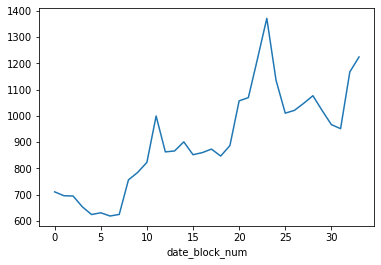

In [189]:
# price trend
sales_train.groupby('date_block_num').mean().item_price.plot()

Average item price is increasing.

In [191]:
sales_train.groupby('year').sum()['revenue']

year
2013    1.217525e+09
2014    1.346778e+09
2015    8.346231e+08
Name: revenue, dtype: float64

Revenue still managed to increase, the effect of increase in price offset the decrease in volumne. There are only 10 months of transaction records in 2015.

In [29]:
# monthly sales for each shop
monthly_sales = sales_train.groupby(['shop_id', 'date_block_num']).sum().reset_index().sort_values(by=['shop_id','date_block_num'])
monthly_sales

,shop_id,date_block_num,item_id,item_price,item_cnt_day,revenue,day,month,year,day_of_week
0,0,0,50791835,2.546339e+06,5578.0,2966412.0,78996,4793,9648309,15156
1,0,1,54019826,3.007530e+06,6127.0,3670958.0,74957,10128,10193832,17321
2,1,0,28789014,1.378736e+06,2947.0,1527320.0,44854,2694,5423022,8846
3,1,1,32161359,1.547425e+06,3364.0,1710887.0,45276,5968,6006792,9883
4,2,0,10025040,1.028861e+06,1146.0,1085064.8,12133,1071,2155923,3383
...,...,...,...,...,...,...,...,...,...,...
1581,59,29,8448873,7.877389e+05,913.0,862364.0,13649,5016,1684540,2740
1582,59,30,9285194,8.085937e+05,992.0,854894.5,14524,6412,1845740,2805
1583,59,31,9177292,8.235957e+05,1214.0,998975.0,17179,7784,1960595,2962
1584,59,32,7333448,8.829707e+05,914.0,1096854.0,10802,7002,1567670,2542


In [30]:
# shop_id not in test set
not_in_test_id = set(monthly_sales.groupby('shop_id').count().index) - set(test.shop_id.unique())
not_in_test_id

{0, 1, 8, 9, 11, 13, 17, 20, 23, 27, 29, 30, 32, 33, 40, 43, 51, 54}

In [31]:
# shops id in test set
temp = monthly_sales.groupby('shop_id').max().reset_index()
in_test = temp[~temp['shop_id'].isin(not_in_test_id)]
in_test

,shop_id,date_block_num,item_id,item_price,item_cnt_day,revenue,day,month,year,day_of_week
2,2,33,13134305,2.704724e+06,1921.0,3.268760e+06,29982,18300,3071350,4797
3,3,33,10248763,1.783833e+06,1275.0,1.949650e+06,22340,13872,2328184,3635
4,4,33,17507849,2.275121e+06,2248.0,2.528582e+06,36201,22872,3836778,6661
5,5,33,18625907,2.335814e+06,2223.0,2.642538e+06,36255,22152,3715998,6592
6,6,33,44209904,4.882556e+06,5467.0,6.053300e+06,87791,54084,9072591,13985
7,7,33,28320609,3.899385e+06,3731.0,4.680701e+06,57927,35904,6022896,9943
10,10,33,10509367,1.129744e+06,1340.0,1.231581e+06,21429,14088,2363262,3562
12,12,33,23664660,4.190912e+06,5215.0,9.779989e+06,36925,26412,4432814,3833
14,14,33,15717811,2.155573e+06,2216.0,2.612519e+06,30185,18756,3349632,6035
15,15,33,29969512,3.730865e+06,4186.0,4.506131e+06,60898,37812,6342963,10328


All the shops in the test set has transactions on Oct 2015, i.e. They are still operating.

In [32]:
# shops id not in test set
not_in_test = temp[temp['shop_id'].isin(not_in_test_id)]
not_in_test

,shop_id,date_block_num,item_id,item_price,item_cnt_day,revenue,day,month,year,day_of_week
0,0,1,54019826,3.007530e+06,6127.0,3670958.00,78996,10128,10193832,17321
1,1,1,32161359,1.547425e+06,3364.0,1710887.00,45276,5968,6006792,9883
8,8,3,13864194,9.024955e+05,1463.0,952881.00,16861,2790,2796057,4856
9,9,33,18231529,1.839812e+06,6526.0,6615741.00,7031,14880,2995344,7031
11,11,25,4839666,4.798425e+05,572.0,521655.14,7707,998,1005485,1704
13,13,19,15704117,4.442430e+05,1358.0,592675.00,20063,13188,2475990,4306
17,17,24,20645166,2.397407e+06,2396.0,2870730.00,38605,24924,4181001,6668
20,20,33,16550232,1.239048e+06,3261.0,3498559.00,3572,9450,1903230,4510
23,23,3,17601156,1.395718e+06,2118.0,1616183.50,27892,6292,3693855,7119
27,27,32,55211764,8.115642e+06,7983.0,12276895.00,109945,69096,11590854,20463


shop 0 and 1 only have 1 month transaction data. This is probably an error. Need to fix in both shops dataframe and train dataframe.

In [48]:
shops = shops.loc[2:]
shops

,shop_id,shop_name
2,2,"Adygea shopping center ""Mega"""
3,3,"Balashikha TRK ""October-Kinomir"""
4,4,"Volzhsky shopping center ""Volga Mall"""
5,5,"Vologda SEC ""Marmelad"""
6,6,"Voronezh (Plekhanovskaya, 13)"
7,7,"Voronezh SEC ""Maksimir"""
8,8,"Voronezh SEC City-Park ""Grad"""
9,9,Offsite Trade
10,10,Zhukovsky st. Chkalov 39m?
11,11,Zhukovsky st. Chkalov 39m²


In [49]:
shops.to_hdf('shops_translated.h5','shops_translated')

In [33]:
not_in_test.drop_duplicates(subset = ['shop_id'], keep = 'last')

,shop_id,date_block_num,item_id,item_price,item_cnt_day,revenue,day,month,year,day_of_week
0,0,1,54019826,3.007530e+06,6127.0,3670958.00,78996,10128,10193832,17321
1,1,1,32161359,1.547425e+06,3364.0,1710887.00,45276,5968,6006792,9883
8,8,3,13864194,9.024955e+05,1463.0,952881.00,16861,2790,2796057,4856
9,9,33,18231529,1.839812e+06,6526.0,6615741.00,7031,14880,2995344,7031
11,11,25,4839666,4.798425e+05,572.0,521655.14,7707,998,1005485,1704
13,13,19,15704117,4.442430e+05,1358.0,592675.00,20063,13188,2475990,4306
17,17,24,20645166,2.397407e+06,2396.0,2870730.00,38605,24924,4181001,6668
20,20,33,16550232,1.239048e+06,3261.0,3498559.00,3572,9450,1903230,4510
23,23,3,17601156,1.395718e+06,2118.0,1616183.50,27892,6292,3693855,7119
27,27,32,55211764,8.115642e+06,7983.0,12276895.00,109945,69096,11590854,20463


All the shops that are not in test set do not have any transactions in Oct 2015. They have closed down

In [34]:
in_test.drop_duplicates(subset = ['shop_id'], keep = 'last')

,shop_id,date_block_num,item_id,item_price,item_cnt_day,revenue,day,month,year,day_of_week
2,2,33,13134305,2.704724e+06,1921.0,3.268760e+06,29982,18300,3071350,4797
3,3,33,10248763,1.783833e+06,1275.0,1.949650e+06,22340,13872,2328184,3635
4,4,33,17507849,2.275121e+06,2248.0,2.528582e+06,36201,22872,3836778,6661
5,5,33,18625907,2.335814e+06,2223.0,2.642538e+06,36255,22152,3715998,6592
6,6,33,44209904,4.882556e+06,5467.0,6.053300e+06,87791,54084,9072591,13985
7,7,33,28320609,3.899385e+06,3731.0,4.680701e+06,57927,35904,6022896,9943
10,10,33,10509367,1.129744e+06,1340.0,1.231581e+06,21429,14088,2363262,3562
12,12,33,23664660,4.190912e+06,5215.0,9.779989e+06,36925,26412,4432814,3833
14,14,33,15717811,2.155573e+06,2216.0,2.612519e+06,30185,18756,3349632,6035
15,15,33,29969512,3.730865e+06,4186.0,4.506131e+06,60898,37812,6342963,10328


In [35]:
# groupby shop_id with count
temp = monthly_sales.groupby('shop_id').count().reset_index()
temp

,shop_id,date_block_num,item_id,item_price,item_cnt_day,revenue,day,month,year,day_of_week
0,0,2,2,2,2,2,2,2,2,2
1,1,2,2,2,2,2,2,2,2,2
2,2,34,34,34,34,34,34,34,34,34
3,3,34,34,34,34,34,34,34,34,34
4,4,34,34,34,34,34,34,34,34,34
5,5,33,33,33,33,33,33,33,33,33
6,6,34,34,34,34,34,34,34,34,34
7,7,34,34,34,34,34,34,34,34,34
8,8,4,4,4,4,4,4,4,4,4
9,9,4,4,4,4,4,4,4,4,4


In [36]:
not_in_test = temp[temp['shop_id'].isin(not_in_test_id)]
not_in_test

,shop_id,date_block_num,item_id,item_price,item_cnt_day,revenue,day,month,year,day_of_week
0,0,2,2,2,2,2,2,2,2,2
1,1,2,2,2,2,2,2,2,2,2
8,8,4,4,4,4,4,4,4,4,4
9,9,4,4,4,4,4,4,4,4,4
11,11,1,1,1,1,1,1,1,1,1
13,13,20,20,20,20,20,20,20,20,20
17,17,20,20,20,20,20,20,20,20,20
20,20,2,2,2,2,2,2,2,2,2
23,23,4,4,4,4,4,4,4,4,4
27,27,32,32,32,32,32,32,32,32,32


In [37]:
in_test = temp[~temp['shop_id'].isin(not_in_test_id)]
in_test

,shop_id,date_block_num,item_id,item_price,item_cnt_day,revenue,day,month,year,day_of_week
2,2,34,34,34,34,34,34,34,34,34
3,3,34,34,34,34,34,34,34,34,34
4,4,34,34,34,34,34,34,34,34,34
5,5,33,33,33,33,33,33,33,33,33
6,6,34,34,34,34,34,34,34,34,34
7,7,34,34,34,34,34,34,34,34,34
10,10,33,33,33,33,33,33,33,33,33
12,12,34,34,34,34,34,34,34,34,34
14,14,34,34,34,34,34,34,34,34,34
15,15,34,34,34,34,34,34,34,34,34


In [51]:
shops

,shop_id,shop_name
2,2,"Adygea shopping center ""Mega"""
3,3,"Balashikha TRK ""October-Kinomir"""
4,4,"Volzhsky shopping center ""Volga Mall"""
5,5,"Vologda SEC ""Marmelad"""
6,6,"Voronezh (Plekhanovskaya, 13)"
7,7,"Voronezh SEC ""Maksimir"""
8,8,"Voronezh SEC City-Park ""Grad"""
9,9,Offsite Trade
10,10,Zhukovsky st. Chkalov 39m?
11,11,Zhukovsky st. Chkalov 39m²


Shop 10 and 11 have very similar name, it could be an error in the naming. The name of shop 36 is very different from all the other, so it is just a new shop.

In [38]:
monthly_sales[monthly_sales['shop_id']==11]

,shop_id,date_block_num,item_id,item_price,item_cnt_day,revenue,day,month,year,day_of_week
248,11,25,4839666,479842.46,572.0,521655.14,7707,998,1005485,1704


In [40]:
monthly_sales[(monthly_sales['shop_id']==10)&(monthly_sales['date_block_num']==25)]

,shop_id,date_block_num,item_id,item_price,item_cnt_day,revenue,day,month,year,day_of_week


Month 25 is missing from shop 10, shop 11 is indeed shop 10

In [50]:
# set shop_id = 11 to 10
sales_train.loc[sales_train['shop_id']==11, 'shop_id'] = 10

In [52]:
# set shop 0 to 57
sales_train.loc[sales_train['shop_id']==0, 'shop_id'] = 57
# set shop 1 to 58
sales_train.loc[sales_train['shop_id']==1, 'shop_id'] = 58

In [53]:
# save sales_train to hdf5
sales_train.to_hdf('sales_train_fixed.h5','sales_train_fixed')

Since there are over 20,000, it is worthwhile to see how many of them are still on sale.

In [54]:
last_month_item = sales_train[sales_train['date_block_num'] == 33].item_id.unique()
all_item = sales_train.item_id.unique()
len(last_month_item)/len(all_item)

0.24822304764525152

Only 25% of items are still on sale. This is very useful information since we can set the prediction of all the other 75% of items to 0. This is a form of data leakage.

In [285]:
# Item in test set but not in training set i.e. new items
new_items = set(test.item_id) - set(all_item)
print(len(new_items))
new_items

363


{83,
 140,
 168,
 173,
 204,
 237,
 249,
 254,
 302,
 402,
 428,
 430,
 454,
 480,
 566,
 639,
 640,
 762,
 892,
 900,
 907,
 1184,
 1193,
 1246,
 1252,
 1253,
 1254,
 1284,
 1386,
 1394,
 1434,
 1436,
 1437,
 1574,
 1575,
 1577,
 1580,
 1585,
 1679,
 1683,
 1732,
 1864,
 1867,
 1884,
 1885,
 2322,
 2323,
 2324,
 2325,
 2326,
 2327,
 2328,
 2420,
 2426,
 2427,
 2428,
 2434,
 2569,
 2722,
 2966,
 3022,
 3023,
 3271,
 3272,
 3273,
 3282,
 3284,
 3338,
 3349,
 3354,
 3405,
 3407,
 3408,
 3538,
 3571,
 3579,
 3604,
 3627,
 3760,
 3867,
 3908,
 3984,
 4060,
 4156,
 4310,
 4318,
 4412,
 4642,
 4925,
 5025,
 5064,
 5121,
 5248,
 5268,
 5269,
 5320,
 5321,
 5322,
 5441,
 5541,
 5569,
 5667,
 5721,
 5722,
 5812,
 5826,
 5843,
 5844,
 5961,
 5963,
 6152,
 6153,
 6169,
 6259,
 6335,
 6439,
 6519,
 6520,
 6521,
 6522,
 6523,
 6524,
 6525,
 6526,
 6527,
 6528,
 6529,
 6530,
 6531,
 6532,
 6533,
 6645,
 6729,
 6730,
 6731,
 6732,
 6733,
 6734,
 6742,
 6743,
 6863,
 6891,
 6903,
 6996,
 7094,
 7124,


Item id are not in numerical order, i.e. newer item does not always has larger item id. That could mean item_id has semantic meaning.

In [72]:
# item 83
items.loc[80:90]

,item_name,item_id,item_category_id
80,12 ROUNDS (BD),80,37
81,12 CHRISTMAS WISHES,81,40
82,12 / TWELVE (BD),82,37
83,12 / TWELVE (SR) (Region),83,40
84,127 HOURS,84,40
85,127 HOURS (BD + DVD),85,37
86,127 HOURS (region),86,40
87,13 FRIENDS OF OCHEN WB (BD),87,37
88,13 FRIENDS OF OACHEN WB (region),88,40
89,13TH WARRIOR wd,89,40


In [73]:
# item 140
items.loc[135:145]

,item_name,item_id,item_category_id
135,1C: Audiobooks. Classical Mosaic. English Stor...,135,45
136,1C: Audiobooks. Happy New English! (Best funny...,136,45
137,1C: Audiobooks. The Golden Age of Detective Fi...,137,44
138,1C: Audiobooks. A. Nekrasov. The Adventures of...,138,45
139,1C: Audiobooks. A.M. Volkov. Wizard of the Eme...,139,45
140,1C: Audiobooks. Aladdin and Other Oriental Tal...,140,45
141,1C: Audiobooks. Aladdin and Other Oriental Tal...,141,44
142,1C: Audiobooks. Alexey Tolstoy. The Adventures...,142,45
143,1C: Audiobooks. The Scarlet Flower and Other T...,143,45
144,1C: Audiobooks. The Scarlet Flower and Other T...,144,44


In [75]:
print(items.loc[140,'item_name'])
print(items.loc[141,'item_name'])

1C: Audiobooks. Aladdin and Other Oriental Tales (Jewel) 
1C: Audiobooks. Aladdin and Other Oriental Tales [PC, Digital] 


For item 83, it is a variant of item 82, and this could be use as a proxy to forecast the sales volume for item 83 in Nov 2015. NLP is necessary to extract features in this case. Can do clustering base on name of item.

In [76]:
# item 21214
items.loc[21210:21220,]

,item_name,item_id,item_category_id
21210,Skyrim Dragon Symbol XL T-shirt,21210,61
21211,Skyrim Dragonborn T-shirt L,21211,61
21212,Skyrim Dragonborn M T-shirt,21212,61
21213,Skyrim Dragonborn XL Tee,21213,61
21214,Starcraft 2 Marine M T-shirt,21214,61
21215,Starcraft II HOTS Hydralisk T-shirt black M,21215,61
21216,Starcraft II HOTS Hydralisk T-shirt black S,21216,61
21217,Starcraft II HOTS Kerrigan Leader T-shirt blac...,21217,61
21218,Starcraft II HOTS Kerrigan Leader T-shirt blac...,21218,61
21219,Starcraft II HOTS Kerrigan Leader T-shirt Blac...,21219,61


Similar items are already grouped together with item_id.

In [77]:
# number of items required precition in test set
test_item_id = test.item_id.unique()
test.item_id.nunique()

5100

In [344]:
# items in train and in test
items_in_train_test = set(all_item).intersection(set(test_item_id))
items_in_train_test

{8192,
 8193,
 16388,
 16395,
 16396,
 16398,
 8208,
 8214,
 8218,
 8219,
 30,
 31,
 32,
 33,
 8226,
 38,
 42,
 45,
 8237,
 8238,
 51,
 8244,
 53,
 16436,
 8247,
 57,
 8249,
 59,
 8251,
 62,
 64,
 8256,
 8257,
 67,
 8260,
 69,
 70,
 16450,
 72,
 16451,
 16459,
 76,
 16461,
 80,
 16469,
 88,
 16474,
 91,
 93,
 8287,
 8296,
 109,
 16494,
 8322,
 16515,
 8327,
 138,
 8330,
 8335,
 8336,
 149,
 16534,
 153,
 154,
 16541,
 16543,
 8352,
 8357,
 166,
 16549,
 8363,
 8364,
 8365,
 8366,
 16556,
 16560,
 180,
 8373,
 16567,
 16573,
 8386,
 16582,
 8391,
 16585,
 202,
 16586,
 205,
 8397,
 8398,
 8400,
 16595,
 213,
 8410,
 16604,
 8416,
 226,
 8418,
 8421,
 16613,
 234,
 16618,
 8428,
 8429,
 8436,
 16629,
 248,
 8443,
 253,
 16638,
 16639,
 8448,
 259,
 8452,
 8453,
 8454,
 8455,
 8456,
 8457,
 8459,
 8460,
 269,
 8461,
 16653,
 16655,
 16657,
 8468,
 8469,
 8470,
 8471,
 8472,
 18572,
 8474,
 8482,
 8484,
 16676,
 16679,
 16680,
 8491,
 18573,
 16690,
 16691,
 308,
 8502,
 8504,
 313,
 16697

In [374]:
# number of tansactions for items in both training and test set
items_in_train_test_count = sales_train.groupby(['item_id']).count().loc[items_in_train_test].sort_values(by=['date'])
items_in_train_test_count

,date,date_block_num,shop_id,item_price,item_cnt_day,day,month,year,day_of_week,revenue
item_id,,,,,,,,,,
3230,1,1,1,1,1,1,1,1,1,1
16105,1,1,1,1,1,1,1,1,1,1
3231,1,1,1,1,1,1,1,1,1,1
16102,1,1,1,1,1,1,1,1,1,1
5959,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
4181,6853,6853,6853,6853,6853,6853,6853,6853,6853,6853
2808,7479,7479,7479,7479,7479,7479,7479,7479,7479,7479
17717,9067,9067,9067,9067,9067,9067,9067,9067,9067,9067


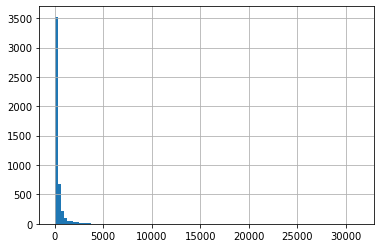

In [387]:
items_in_train_test_count.date.hist(bins = 100)

(0, 5000)

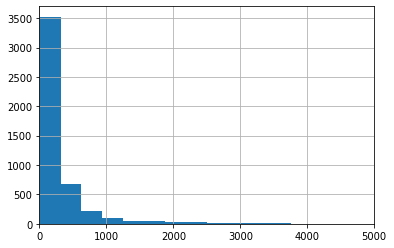

In [388]:
ax = items_in_train_test_count.date.hist(bins = 100)
ax.set_xlim((0,5000))

There are lots of rare items.

## Reproduce benchmark

In [524]:
oct_2015 = sales_train[sales_train['date_block_num']==33].groupby(['shop_id', 'item_id'])['item_cnt_day'].sum().reset_index()
oct_2015['item_cnt_day'] = oct_2015['item_cnt_day'].clip(0,20)
oct_2015.head()

,shop_id,item_id,item_cnt_day
0,2,31,1.0
1,2,486,3.0
2,2,787,1.0
3,2,794,1.0
4,2,968,1.0


In [529]:
submit = pd.merge(test, oct_2015, how = 'left', on = ['shop_id', 'item_id'])
submit.fillna(0, inplace = True)
submit = submit[['ID','item_cnt_day']]
submit.columns = ['ID', 'item_cnt_month']
submit.to_csv('submit.csv', index = False)

The result is indeed 1.16777. Lag values have significant predictive power.